In [78]:
import numpy as np
from matplotlib import pyplot as plt
from time import time
from lib import Loss, Distance, KNN
import pandas as pd

Load data and shape initially. Transform y's with natural logarithm for a linear model

In [79]:
data = np.loadtxt("pcb/PCB.dt")
x, y = data[:,0], data[:,1]
xs = x.reshape((len(x), 1))
ys = np.log(y)

Calculating h using QR decomposition and solving

In [80]:
xs_pad = np.pad(xs, [(0, 0), (0, 1)], mode='constant', constant_values=1)
q, r = np.linalg.qr(xs_pad)
q_y_dot = np.dot(q.T, ys)
a, b  = np.linalg.solve(r, q_y_dot)
print(f"h'={a:.4f}x + {b:.4f}")

h'=0.2591x + 0.0315


Calculating h using QR decomposition and numpy.linalgs inversion

In [81]:
xs_pad = np.pad(xs, [(0, 0), (0, 1)], mode='constant', constant_values=1)
q, r = np.linalg.qr(xs_pad)
a, b = np.linalg.inv(r)@q.T@ys.T
print(f"h'={a:.4f}x + {b:.4f}")

h'=0.2591x + 0.0315


Calculating h using only numpy.linalgs inversion

In [82]:
xs_pad = np.pad(xs, [(0, 0), (0, 1)], mode='constant', constant_values=1)
a, b = np.linalg.inv(xs_pad.T@xs_pad) @ xs_pad.T@ys
print(f"h'={a:.4f}x + {b:.4f}")

h'=0.2591x + 0.0315


Coefficient of determination R2

In [83]:
def coefficient_of_determination(h, ys):
    r1 = np.sum((ys - h)**2)
    y_mean = np.mean(ys)
    r2 = np.sum((ys - y_mean)**2)

    return  1 - r1/r2

Exponential y-values plotted

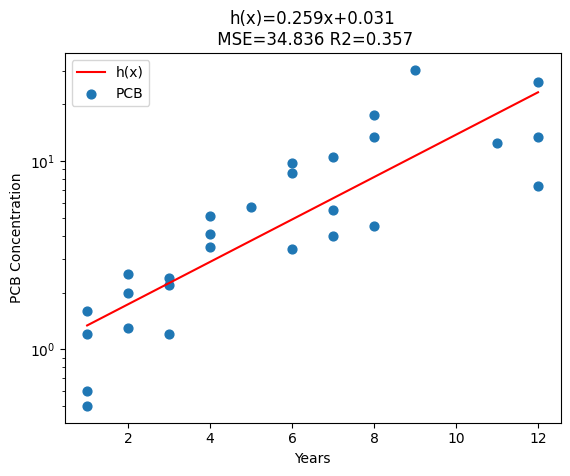

MSE: 34.83556116722035
R2: 0.3570135731609865


In [84]:
h = np.exp(a * xs + b)[:, 0]

u_xs = np.unique(xs).flatten()
u_ys = np.unique(h).flatten()

mse = Loss.mse(h, y)
r2 = coefficient_of_determination(h, y)

plt.plot(u_xs, u_ys, '-r', label='h(x)')
plt.scatter(xs, y, s=40, label='PCB')
plt.legend()
plt.xlabel("Years")
plt.ylabel("PCB Concentration")
plt.yscale('log')
plt.title(f"h(x)={a:.03f}x+{b:.03f}\n MSE={mse:.3f} R2={r2:.3f}")
plt.savefig("images/exp_lin_reg.png")
plt.show()
print("MSE:", mse)
print("R2:", r2)

Let's build a non-linear model

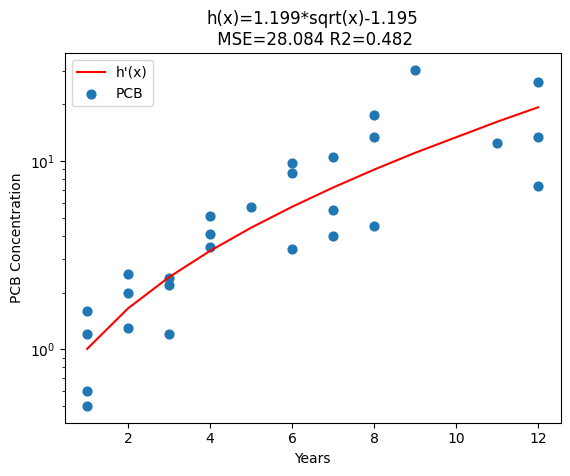

MSE: 28.08439017494435
R2: 0.48162506692924145


In [85]:
xs_pad = np.pad(np.sqrt(xs), [(0, 0), (0, 1)], mode='constant', constant_values=1)
q, r = np.linalg.qr(xs_pad)
q_y_dot = np.dot(q.T, ys)
a, b  = np.linalg.solve(r, q_y_dot)

h_sqrt = np.exp(a * np.sqrt(xs) + b)[:, 0]
u_xs = np.unique(xs).flatten()
u_ys = np.unique(h_sqrt).flatten()

mse = Loss.mse(h_sqrt, y)
r2= coefficient_of_determination(h_sqrt, y)

plt.plot(u_xs, u_ys, '-r', label='h\'(x)')
plt.scatter(xs, y, s=40, label='PCB')
plt.legend()
plt.xlabel("Years")
plt.ylabel("PCB Concentration")
plt.yscale('log')
plt.title(f'h\'(x)={a:.03f}*sqrt(x){b:.03f}\n MSE={mse:.3f} R2={r2:.3f}')
plt.savefig("images/non_linear_reg.png")
plt.show()
print("MSE:", mse)
print("R2:", r2)